<a href="https://colab.research.google.com/github/guimarczewski/From-Data-to-Insights-with-Google-Cloud/blob/main/3_Building_Transformations_and_Preparing_Data_with_Wrangler_in_Cloud_Data_Fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building Transformations and Preparing Data with Wrangler in Cloud Data Fusion


Ao trabalharmos com dados, é importante podermos vermos a sua aparência bruta como ponto de partida para sua transformação. Com o Wrangler, podemos adotar uma abordagem de dados em primeiro lugar para o fluxo de trabalho de integração de dados.

A fonte de dados mais comum para fluxos de ETL (Extract-Transform-Load) são  dados armazenados em arquivos de texto no formato de valores separados por vírgulas (CSV), já que muitos sistemas de banco de dados exportam e importam dados dessa maneira. Para os fins deste laboratório, usaremos um arquivo CSV, mas as mesmas técnicas podem ser aplicadas a fontes de banco de dados e a qualquer outra fonte de dados disponível no Cloud Data Fusion.

### Objetivos
Neste laboratório, iremos realizar as seguintes tarefas:

*  Criar um pipeline para ingestão de um arquivo CSV.
*  Usar o Wrangler para aplicar transformações por meio de apontar e clicar e das interfaces CLI.

Na maior parte deste lab, trabalharemos com as etapas de transformação do Wrangler, que são usadas pelo plug-in do Wrangler para que as transformações sejam encapsuladas em um só lugar e possamos agrupar tarefas de transformação em blocos gerenciáveis. Essa abordagem de dados em primeiro lugar permitirá que visualizemos rapidamente as transformações.



###Ativando o Cloud Shell

O Cloud Shell é uma máquina virtual que contém ferramentas de desenvolvimento. Ele oferece um diretório inicial de 5 GB e é executado no Google Cloud. O Cloud Shell fornece acesso de linha de comando aos seus recursos do Google Cloud. gcloud é a ferramenta de linha de comando do Google Cloud. Ele vem pré-instalado no Cloud Shell e é compatível com a conclusão de guias.

Para ativar o Cloud Shell, basta selecionar o ícone no canto superior direito do console do GCP.

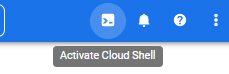

Após carregar por alguns segundos, será aberto a interface do CLI, exibindo tanto a conta de quem está acessando, quanto o PROJECT_ID, que nesse caso está borrado com amarelo e azul.

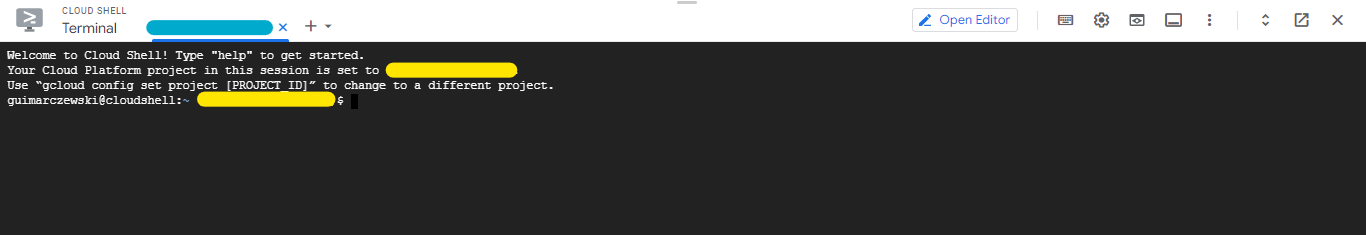

Existem diversos comandos para serem utilizados no Cloud Sheel, como "gcloud auth list" para exibir o nome da conta ativa e "gcloud config list project" para listar o projeto atual.

Para mais comandos, basta acessar o [gcloud command-line tool overview](https://cloud.google.com/sdk/gcloud).

## IAM e permissões

###IAM

Para dar seguimento ao nosso projeto, precisamos que o nosso usuário tenha a função de editor. Para verificar isso basta acessar o menu de navegação, selecionar "IAM e administrador" e depois "IAM".

Após acessar o IAM, basta verificar se a conta padrão está presente e tem a função de editor atribuída.

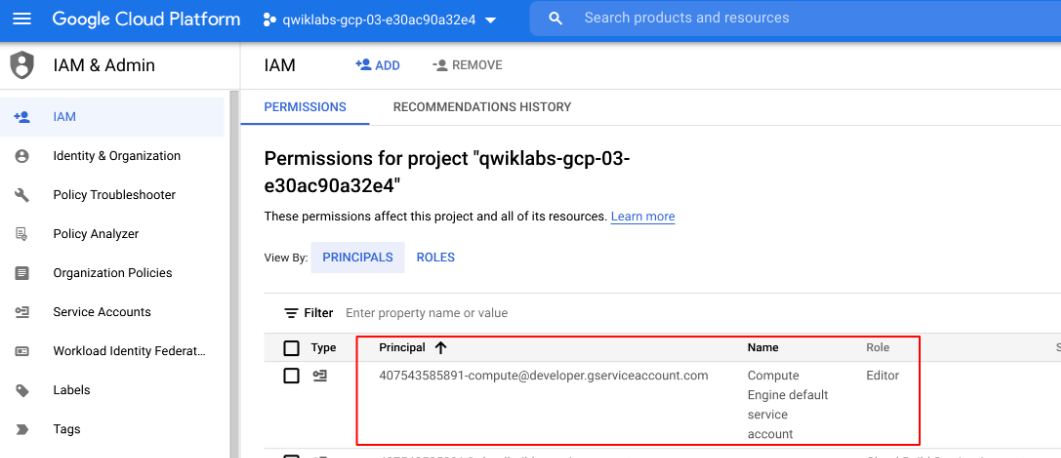

Caso a conta não esteja presente no IAM ou não esteja com a função de editor, teremos que atribuir a função necessária. 
Para isso precisaremos do número do projeto, que está na página inicial do GCP console, e voltar para a página do IAM, clicando em adicionar e inserindo o seguinte usuário: 

`{project-number}-compute@developer.gserviceaccount.com`

Para alterar a função do mesmo, selecionaremos "Projeto" e "Editor".

###Permissões Cloud Data Fusion

No menu de navegação, acessaremos "Data Fusion" e "Instâncias". Por ser um laboratório da Coursera, nesse caso já temos uma instância criada e pronta para uso, só teremos que conceder as permissões necessárias.

Após clicar no nome da instância, serão exibidas diversas informações sobre ela. Nós precisaremos copiar a conta de serviço.

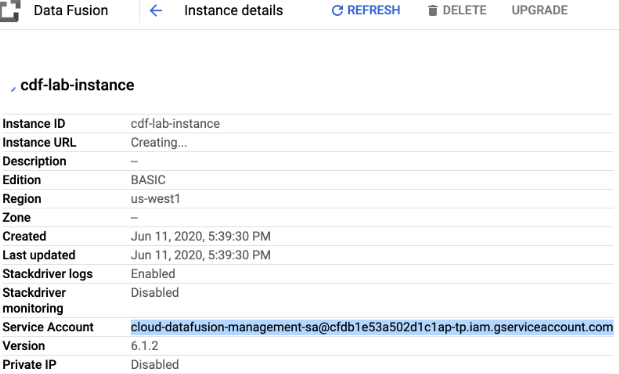

Após copiar a conta de serviço, voltaremos ao IAM e adicionaremos uma nova permissão.

Após clicar em "Add", colaremos a conta de serviço no campo "New principals", e na permissão selecionaremos "Cloud Data Fusion API Service Agent". Após isso basta salvar.

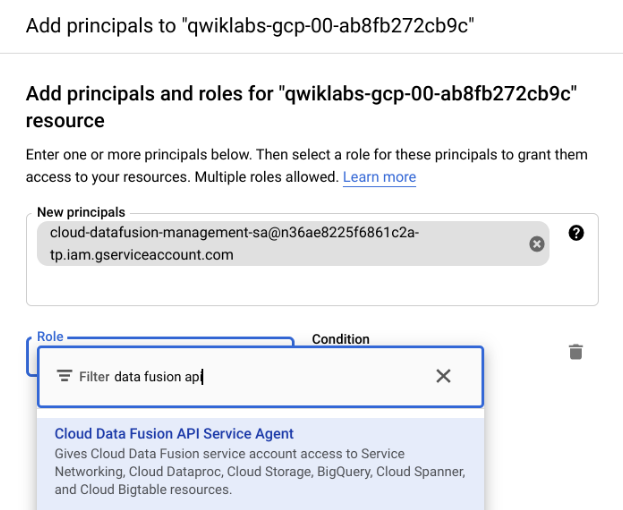

Após voltar ao IAM, marcaremos a checkbox "Include Google-provide role grants", para incluir concessões de função fornecidas pelo Google.

Rolaremos para baixo até encontrar a conta de serviço do Cloud Data Fusion e copiá-la.


```
service-{project-number}@gcp-sa-datafusion.iam.gserviceaccount.com
```

E da mesma maneira que adicionamos a permissão de "Editor" para o usuário em uso, agora adicionaremos a função "usuário da conta de serviço" para a conta do Data Fusion.

Após isso, basta salvar para finalizar a definição de permissões.

###Carregando os dados

Agora iremos criar um bucket do Cloud Storage, utilizando o Cloud Shell para armazenar alguns dados de amostra para o Wrangling, após isso os dados serão lidos pelo Data Fusion.

Pelo cloud shell criaremos um bucket com o mesmo nome do nosso ID Projeto:



In [ ]:
export BUCKET=$GOOGLE_CLOUD_PROJECT
gsutil mb gs://$BUCKET

Agora copiaremos um arquivo CSV de treino para dentro do nosso bucket:

In [ ]:
gsutil cp gs://cloud-training/OCBL163/titanic.csv gs://$BUCKET

###Navegando pela Cloud Data Fusion UI

Na UI do Data Fusion conseguimos acessar diversos recursos do mesmo, como o Pipeline Studio e o Wrangler.

Para acessá-la, basta pesquisar por Data Fusion no menu de navegação. Após isso basta selecionar "Visualizar instância", ao lado da instância do Data Fusion.

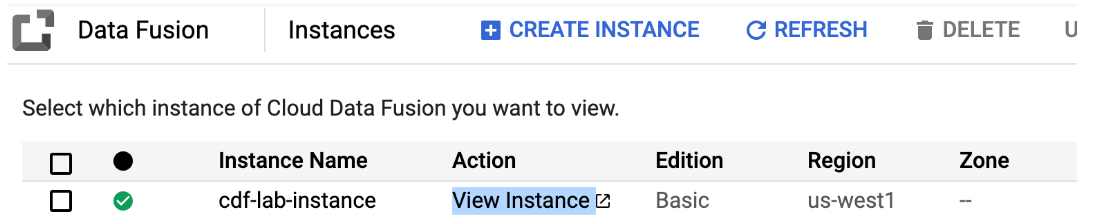

A UI da Web do Cloud Data Fusion vem com seu próprio painel de navegação (à esquerda) para navegar até a página que você precisa. Na UI do Data Fusion, clicaremos no menu de navegação no canto superior esquerdo para expor o painel de navegação e acessar o Wrangler.

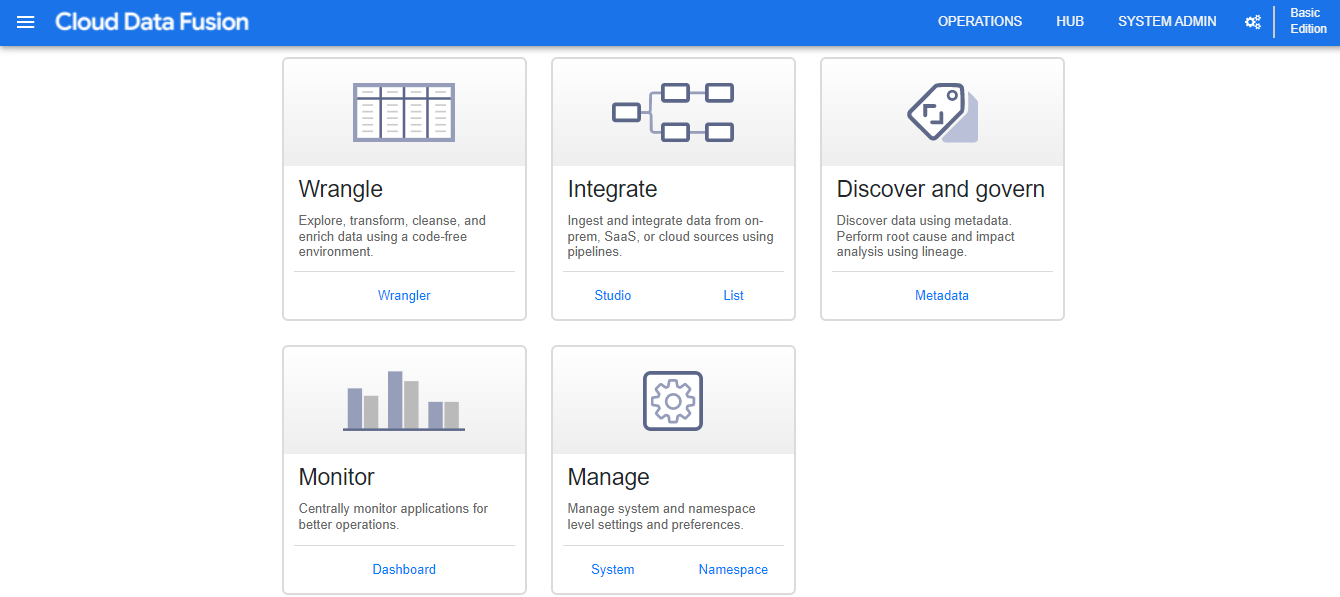

###Trabalhando com o Wrangler

O Wrangler é uma ferramenta visual interativa que permite que você veja os efeitos das transformações em um pequeno subconjunto de seus dados antes de despachar grandes trabalhos de processamento paralelo em todo o conjunto de dados.

Quando o Wrangler é carregado, o lado esquerdo do painel exibe as conexões pré-configuradas para os dados, incluindo o Cloud Storage, que é o que selecionaremos para acessar o bucket criado anteriormente com o nome igual o do ID do projeto.



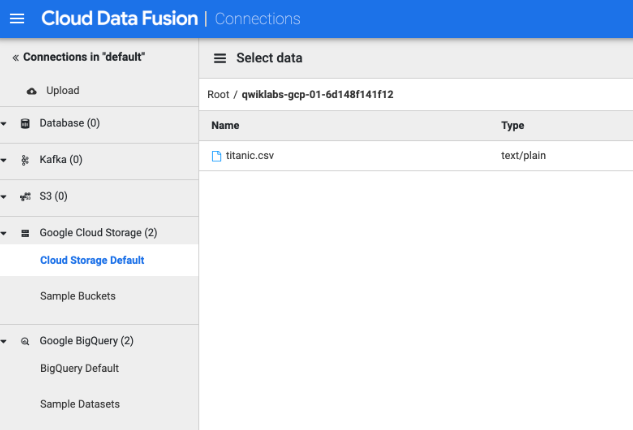

Ao clicar em titanic.csv, uma amostra dos dados é exibida.

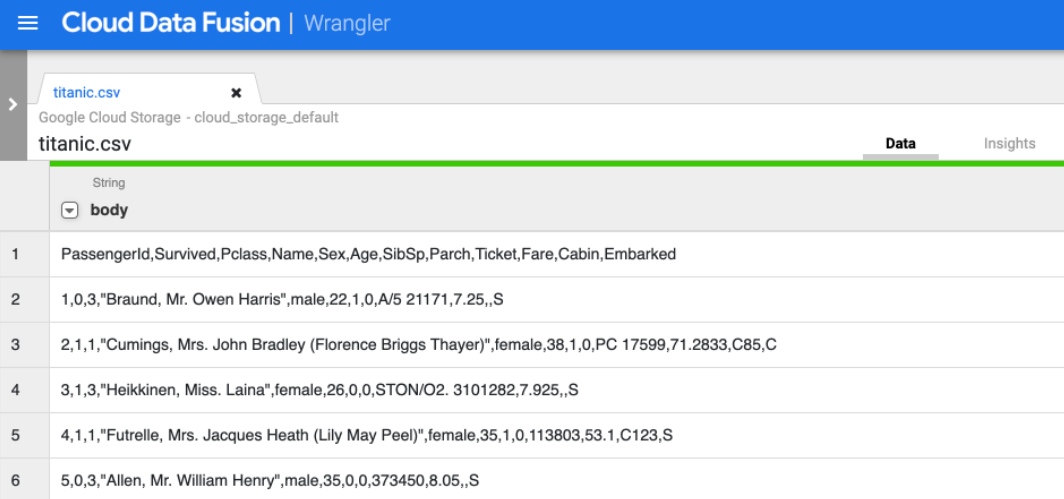

A primeira operação é analisar os dados CSV brutos em uma representação tabular que é dividida em linhas e colunas. Para fazer isso, selecionaremos o ícone suspenso no cabeçalho da primeira coluna e, em seguida, o item de menu Analisar e CSV no submenu.

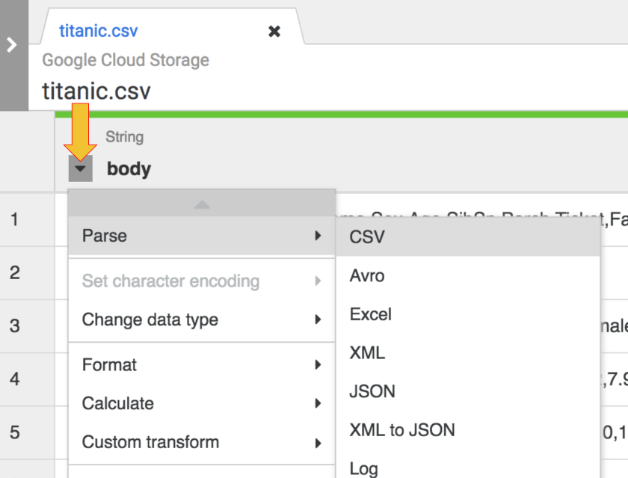

Nos dados brutos, podemos ver que a primeira linha consiste em cabeçalhos de coluna, portanto, selecionaremos a opção "Definir primeira linha como cabeçalho" na caixa de diálogo "Analisar como CSV".

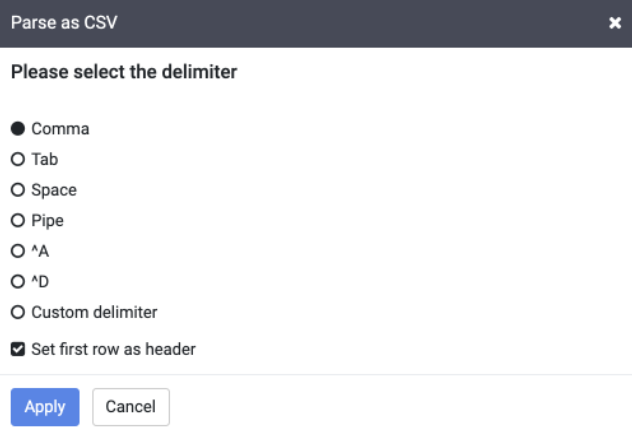

Nesta fase, os dados brutos são exibidos ​​e você pode ver as colunas geradas por esta operação à direita da coluna body.

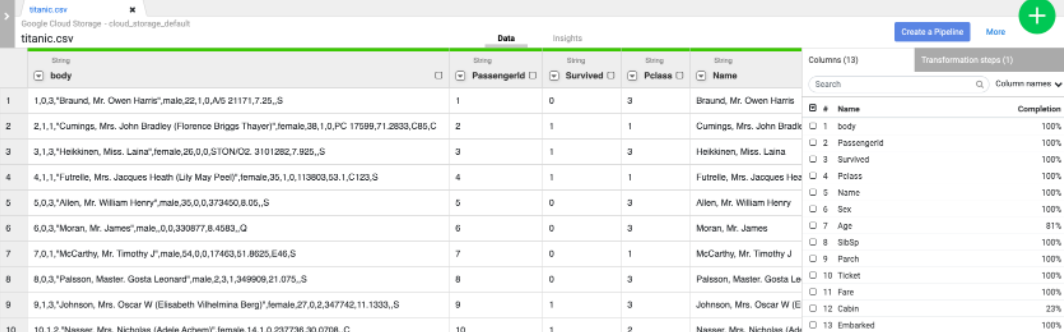

Como não precisamos mais da coluna body, podemos removê-la selecionando o ícone suspenso ao lado do cabeçalho da coluna body e clicando em "Excluir coluna".

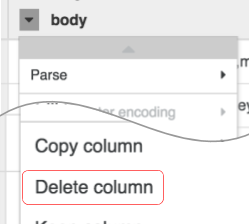

Para aplicar transformações, também poderíamos usar a interface de linha de comando (CLI). À medida que começamos a digitar os comandos, o recurso de preenchimento automático é ativado e apresenta uma opção correspondente. Por exemplo, para descartar a coluna body, poderíamos ter usado alternativamente a diretiva: "drop :body"


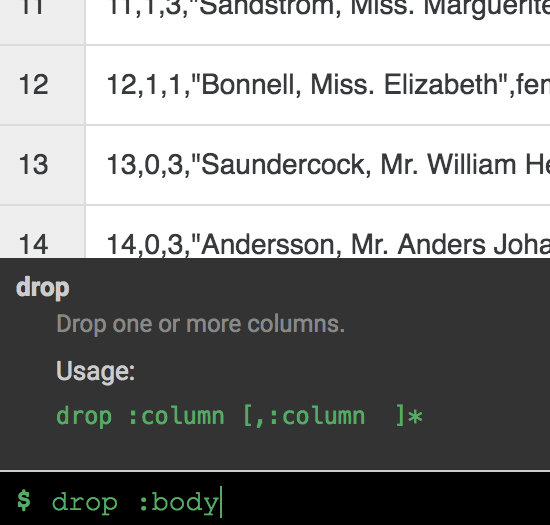

Clique na guia Etapas de transformação na extremidade direita da interface do usuário do Wrangler. Você verá as duas transformações que aplicou até agora.

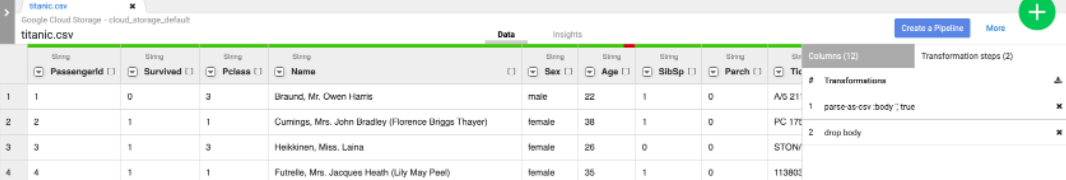

Tanto as seleções de menu quanto a CLI criam diretivas que são visíveis na guia Etapas de transformação à direita da tela. As diretivas são transformações individuais que são coletivamente chamadas de receita.

Conforme aplicamos as Etapas de Transformação ao seu conjunto de dados, as transformações afetam os dados de amostra e fornecem dicas visuais que podem ser exploradas por meio do navegador Insights.

Clicando na guia Insights na área central superior podemos ver como os dados são distribuídos pelas várias colunas.





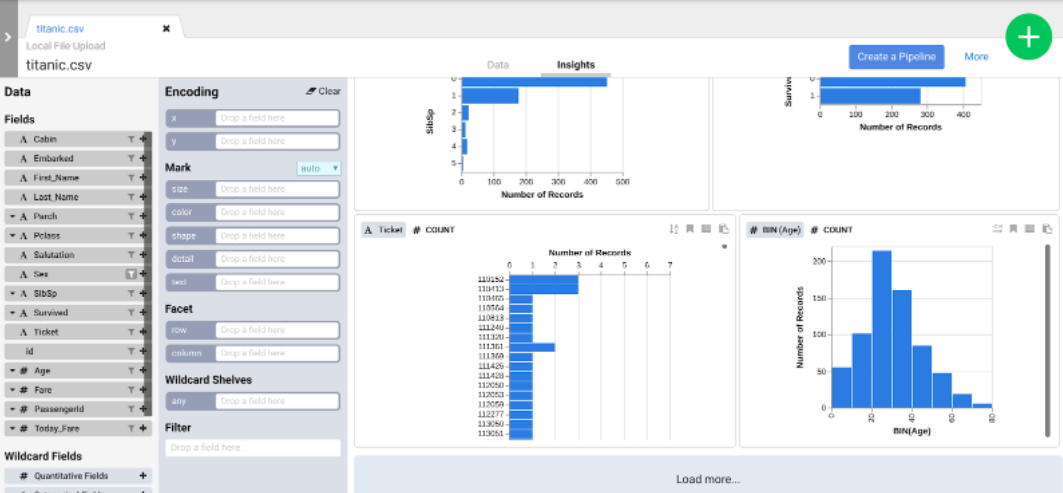

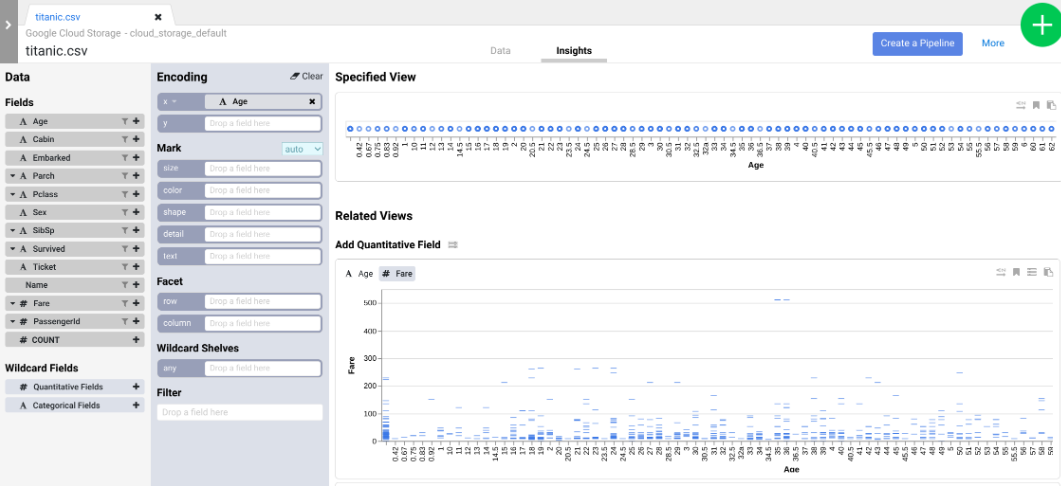

No canto superior direito, podemos selecionar o botão "Create a Pipeline" e logo em seguida "Batch Pipeline" para fazer a transição para o modo de denvolvimento de pipelines, onde podemos verificar as diretrizes criadas no plug-in Wrangler. 

Quando o Pipeline Studio for aberto, basta passar o mouse sobre o nó Wrangler e clicar em Properties. Em Directiver, podemos verificar as diretivas criadas anteriormente.

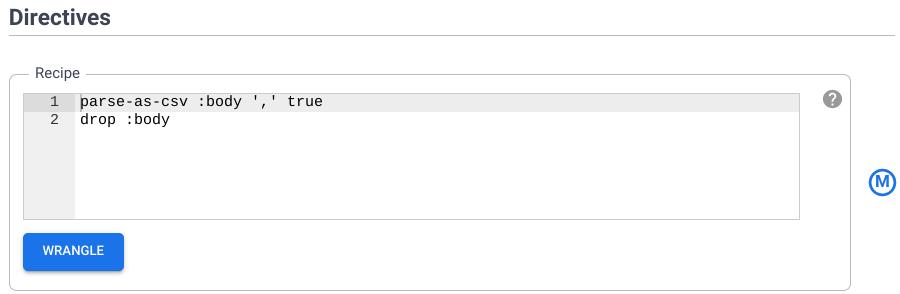

###Trabalhando com etapas de transformação

Para voltar à interface do usuário do Wrangler, basta clicar no botão Wrangle na seção Directives da caixa Properties do seu nó Wrangler.

Agora adicionaremos mais etapas de transformação usando a CLI e veremo como elas modificam os dados.

* fill-null-or-empty :Cabin 'none'corrige a coluna Cabine para que fique 100% completa.

* send-to-error empty(Age)corrige a coluna Idade para que não haja células vazias

* parse-as-csv :Name ',' falsedivide as colunas Nome em 2 colunas separadas contendo o nome e o sobrenome

* rename Name_1 Last_Namee rename Name_2 First_Namerenomeie as colunas recém-criadas, Name_1 e Name_2 , em Last_Name e First_Name

* drop Name: remove a coluna Nome , pois não é mais necessária

* set-type: PassengerId integerconverte a coluna PassengerId em um inteiro

* as diretivas abaixo extraem a saudação da coluna First_Name, excluem a coluna redundante e renomeiam as colunas recém-criadas de acordo:



In [ ]:
parse-as-csv :First_Name '.' false
drop First_Name
drop First_Name_3
rename First_Name_1 Salutation
fill-null-or-empty :First_Name_2 'none'
rename First_Name_2 First_Name

* a send-to-error !dq:isNumber(Age) || !dq:isInteger(Age) || (Age == 0 || Age > 125)diretiva executa verificações de qualidade de dados na coluna Idade enquanto a set-type :Age integerdefine como uma coluna Integer

* set-type :Fare doubleconverte a coluna Fare para um Double para que você possa realizar alguma aritmética com os valores da coluna

* set-column Today_Fare (Fare * 23.4058)+1multiplica a coluna Tarifa pela taxa de inflação do dólar desde 1912 para obter o valor ajustado do dólar

* generate-uuid idcria uma coluna de identidade para identificar exclusivamente cada registro

* mask-shuffle First_Nameirá mascarar a coluna Last_Name para desidentificar a pessoa, ou seja, PII

Agora agruparemos todo o código de transformação e colaremos no CLI:

In [ ]:
fill-null-or-empty :Cabin 'none'
send-to-error empty(Age)
parse-as-csv :Name ',' false
drop Name
fill-null-or-empty :Name_2 'none'
rename Name_1 Last_Name
rename Name_2 First_Name
set-type :PassengerId integer
parse-as-csv :First_Name '.' false
drop First_Name
drop First_Name_3
rename First_Name_1 Salutation
fill-null-or-empty :First_Name_2 'none'
rename First_Name_2 First_Name
send-to-error !dq:isNumber(Age) || !dq:isInteger(Age) || (Age == 0  || Age > 125)
set-type :Age integer
set-type :Fare double
set-column Today_Fare (Fare * 23.4058)+1
generate-uuid id
mask-shuffle First_Name

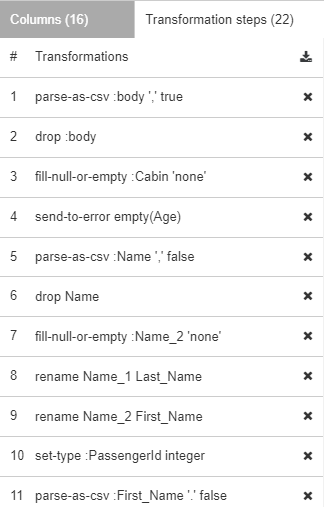

Clicando em "More", no canto superior direito acima de suas etapas de transformação e, em seguida, em Exibir esquema para examinar o esquema gerado pelas transformações e clicaremos no ícone de download para baixá-lo em nosso computador.

Também podemos clicar no ícone de download em Etapas de transformação para baixar a receita de diretivas para o seu computador para manter uma cópia das etapas de transformação para uso futuro.



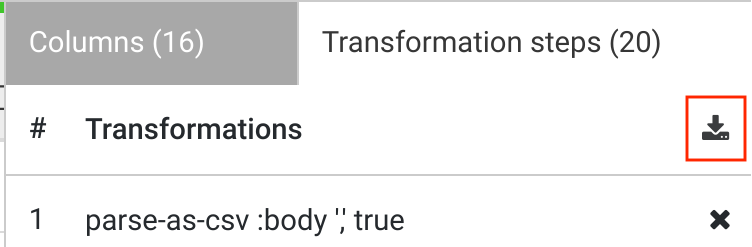

Ao clicar no botão Aplicar no canto superior direito garantimos que todas as etapas de transformação recém-introduzidas serão adicionadas à configuração do nó do Wrangler. Você será redirecionado de volta para a caixa de propriedades do nó Wrangler. Após clicar no X para fechá-lo, voltamos ao Pipeline Studio.



###Ingestão no BigQuery

Para ingerir os dados no BigQuery, primeiro teremos que criar um conjunto e dados.

Em uma nova guia, abriremos a UI do BigQuery no Console do GCP ou clicaremos com o botão direito do mouse na guia Console do Cloud e em Duplicar, após isso basta usar o menu de navegação para selecionar BigQuery.

No painel Explorer, clicaremos no ícone Exibir ações ao lado do ID do projeto  e selecionaremos "Criar conjunto de dados".



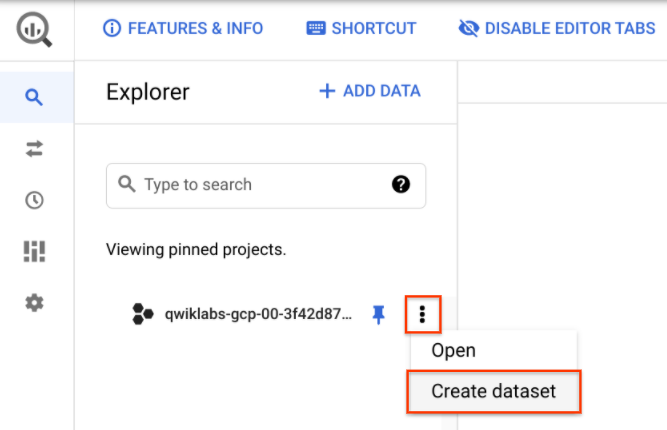

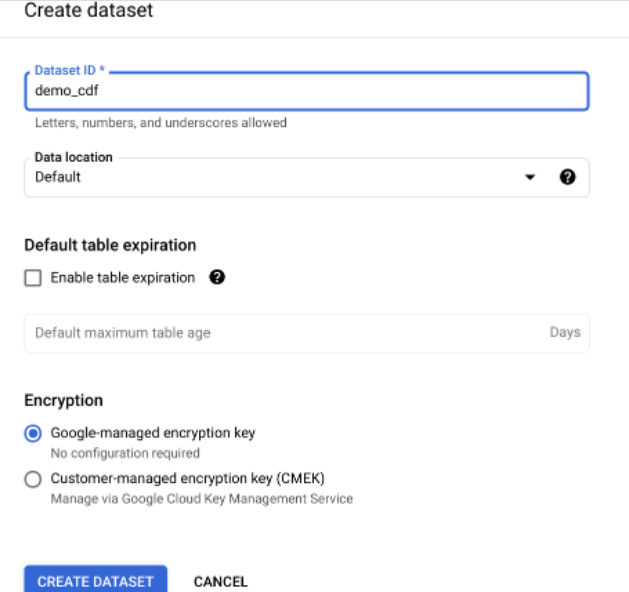

Agora navegaremos de volta ao UI do Cloud Data Fusion.

Para adicionar o coletor do BigQuery ao pipeline, navegaremos até a seção Coletor no painel esquerdo e clique no ícone do BigQuery para colocá-lo na tela.

Depois que o coletor do BigQuery for colocado na tela, basta conectar o nó do Wrangler ao nó do BigQuery, arrastando a seta do nó do Wrangler para se conectar ao nó do BigQuery.

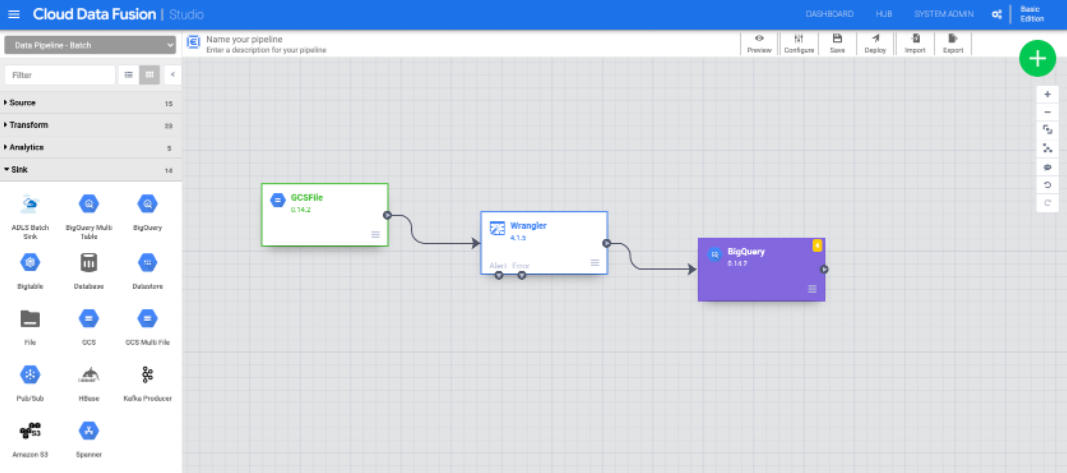

Ao passar o mouse sobre o nó do BigQuery, clicaremos em Propriedades e ajustaremos as configurações:

*  DemoSink como reference name.
*  ID do projeto em Dataset Project Id.
*  demo_cdf como dataset, que é o que criamos anteriormente.
*  titanic como nome da tabela, que será criada automaticamente.



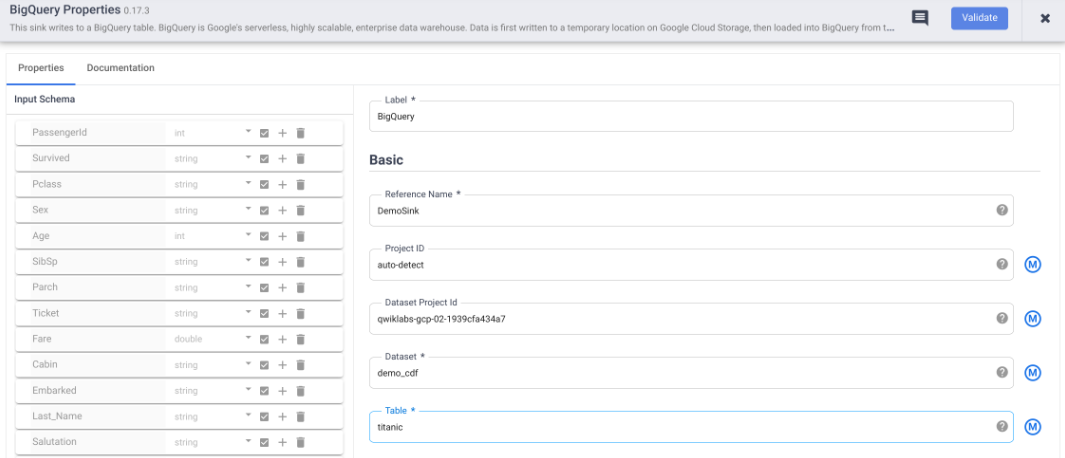

Agora podemos clicar no X no canto superior direito e retornaremos ao Pipeline Studio.

Agora podemos executar nosso pipeline, que chamaremos de "DemoBQ".

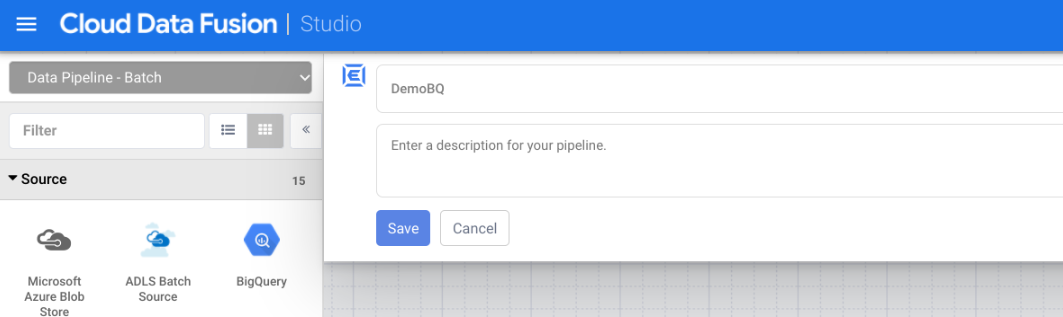

Agora basta salvar e clicar em deploy no canto superior direito para implantar o pipeline.

Com o pipeline implantado, podemos clicar em executar para iniciar o pipeline. Podemos clicar no ícone "Resumo" para ver algumas estatísticas.

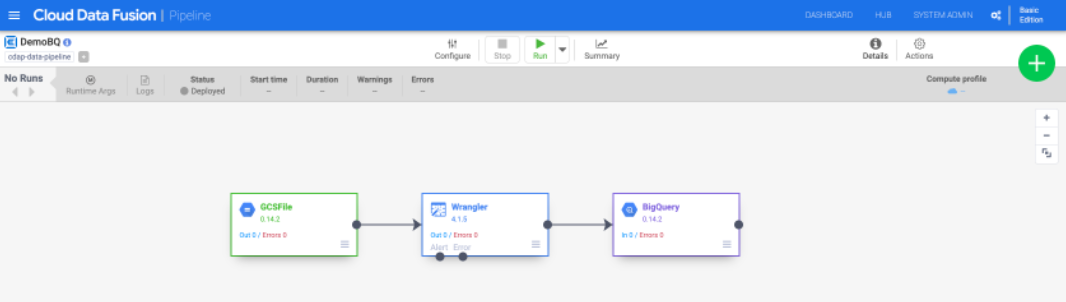

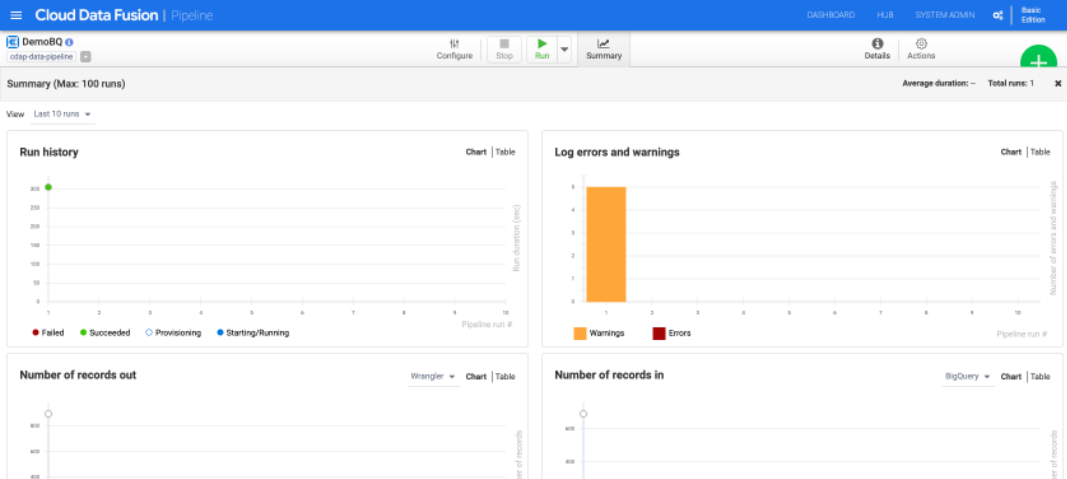

Após a conclusão da execução, o status mudará para Succeeded. Ao navegar de volta ao console do BigQuery, podemos consultar seus resultados.

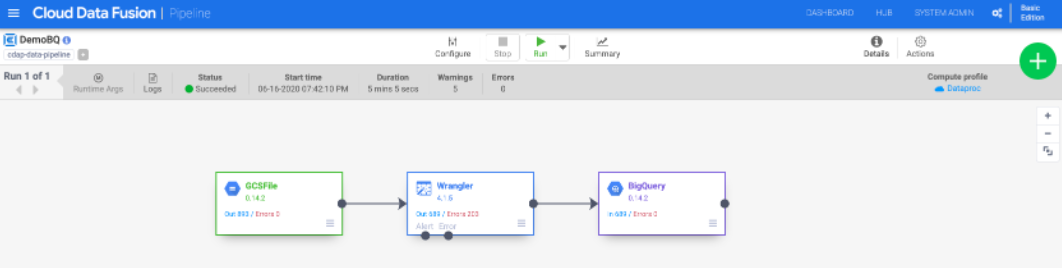

Com isso, encerramos o nosso pipeline e também esse projeto, que demonstrou como usar o Wrangler, o Cloud Shell e o Google Data Fusion.